In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import random
from sklearn.decomposition import PCA
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
path= "./data/train"
IMG_SIZE=90
#os.listdir(path)

## lets create our dataframe 

In [2]:
filenames=os.listdir(path)
category=[]
#dog is 1 cat is 0
for filename in filenames:
    if 'dog' in filename:
        category.append(1)
    else:
        category.append(0)

df={'filename':filenames,'category':category}
df=pd.DataFrame(df)

In [3]:
#df = df.sample(frac = 1).reset_index(drop=True)
train_df, validate_df = train_test_split(df, test_size=0.2,shuffle=True,random_state=42)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()
#df.reset_index(drop=True)

In [4]:
validate_df

,index,filename,category
0,6868,cat.493.jpg,0
1,24016,dog.9112.jpg,1
2,9668,cat.745.jpg,0
3,13640,dog.11022.jpg,1
4,14018,dog.11363.jpg,1
...,...,...,...
4995,8670,cat.6551.jpg,0
4996,11839,cat.9403.jpg,0
4997,4013,cat.236.jpg,0
4998,21147,dog.6530.jpg,1


In [5]:
train_df=train_df.drop("index",axis=1)
validate_df=validate_df.drop("index",axis=1)

In [6]:
train_df["category"].value_counts()
#train_df

1    10015
0     9985
Name: category, dtype: int64

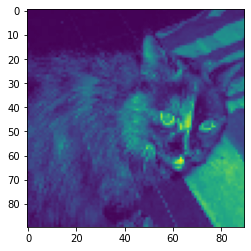

In [7]:
any_file=random.choice(df.filename)
img=cv2.imread(path+'/'+str(any_file))
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
plt.imshow(img)

In [8]:
#img.shape
#df["category"] = df["category"].replace({'cat': 1, 'dog': 0})
x_train=[]
y_train=[]
x_test=[]
y_test=[]
for i in range(len(train_df)):
            img_path = path+'/'+train_df["filename"][i]
            image = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
           # image = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
            #here, we are normalizing the images
            norm_image = image/255.0 
            #Creating and saving each image in the form of numerical data in an array
           # df['data'][i]=np.array(norm_image)
            x_train.append(norm_image)
            y_train.append(train_df["category"][i])
for i in range(len(validate_df)):
            img_path = path+'/'+validate_df["filename"][i]
            image = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
           # image = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
            #here, we are normalizing the images
            norm_image = image/255.0 
            #Creating and saving each image in the form of numerical data in an array
            # df['data'][i]=np.array(norm_image)
            x_test.append(norm_image)
            y_test.append(validate_df["category"][i])
#np.save('data.npy',img_data)
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
#df["data"]=img_data

In [9]:
#df_t = pd.DataFrame({'data': img_label, 'label': img_data}, columns=['label', 'data'])
#df_t = pd.DataFrame(img_data, columns=['data'])
#img_data.shape
#y_train.shap
validate_df
#y_train.value
#x_test.shape

,filename,category
0,cat.493.jpg,0
1,dog.9112.jpg,1
2,cat.745.jpg,0
3,dog.11022.jpg,1
4,dog.11363.jpg,1
...,...,...
4995,cat.6551.jpg,0
4996,cat.9403.jpg,0
4997,cat.236.jpg,0
4998,dog.6530.jpg,1


## lets split the data to train and test

In [13]:
#df.reset_index(drop=True)
#df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)
#img_data=img_data.reshape(-1,IMG_SIZE*IMG_SIZE)
x_train=x_train.reshape(-1,IMG_SIZE*IMG_SIZE)
x_test=x_test.reshape(-1,IMG_SIZE*IMG_SIZE)
# x_train=img_data[:20000]
# y_train=img_label[:20000]
# x_test=img_data[20000:]
# y_test=img_label[20000:]
#img_label.shape
y_train.shape

(20000,)

In [14]:
# df={'Data':img_data,'label':img_label}
# df=pd.DataFrame(df)
#df
#img_data.shape
x_train.shape
#plt.imshow(x_train[2].reshape(IMG_SIZE,IMG_SIZE))
#df_train['data'].shape

(20000, 8100)

In [15]:
# x_train=np.array(df_train['data'])
#x_train.shape
# x_train.shape
# plt.imshow(x_train[0])
# x_train.shape

In [ ]:
pca=PCA(n_components=0.9)
x_red=pca.fit_transform(x_train)
# #y_red=pca.tranform(y_train)
# #x_red_inv=pca.inverse_transform(x_red)
x_test_red=pca.transform(x_test)
x_red.shape

In [21]:
x_test.shape

(5000, 4900)

In [23]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

In [21]:
# knn_grid={'n_neighbors':[120,200,300]}
# knn_gs=GridSearchCV(KNeighborsClassifier(),knn_grid,verbose=3,n_jobs=-1)
# knn_gs_results =knn_gs.fit(x_red,y_train)
# xgb_grid={'n_estimators':[150,200,300,400],'learning_rate':[0.1,0.5,1]}
# xgb_gs=GridSearchCV(xgb.XGBClassifier(use_label_encoder=False,eval_metric="mlogloss"),xgb_grid,cv=5,
#                     scoring='accuracy',verbose=10,n_jobs=-1)
# xgb_gs_results =xgb_gs.fit(x_red,y_train)
# ens_grid={'base_estimator':[LogisticRegression(multi_class='ovr',max_iter=1000),RandomForestClassifier(n_estimators=1200)
#                            ]}
# ada_gs=GridSearchCV(AdaBoostClassifier(),ens_grid,cv=3,
#                      scoring='accuracy',verbose=3,n_jobs=-1)
# ada_gs_results=ada_gs.fit(x_red,y_train)
# xrf_grid={'n_estimators':[500,700,1000,1200,2000]}
# xrf_gs=GridSearchCV(ExtraTreesClassifier(bootstrap=True,oob_score=True,random_state=42),xrf_grid,cv=5, scoring='accuracy',verbose=10,n_jobs=-1)
# xrf_gs_result=xrf_gs.fit(x_red,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [22]:
xrf_gs_result.best_estimator_

ExtraTreesClassifier(bootstrap=True, n_estimators=2000, oob_score=True,
                     random_state=42)

In [24]:
xgb_clf=xgb.XGBClassifier(learning_rate=0.1,n_estimators=400,use_label_encoder=False,objective="binary:logistic",eval_metric="auc",verbosity=1)
xgb_clf.fit(x_red,y_train)
y_pred=xgb_clf.predict(x_test_red)
#scores["XGBoost"]=accuracy_score(y_test,y_pred)

print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.6250    0.6394    0.6321      2515
           1     0.6263    0.6117    0.6189      2485

    accuracy                         0.6256      5000
   macro avg     0.6256    0.6255    0.6255      5000
weighted avg     0.6256    0.6256    0.6255      5000



In [12]:
vote_clf =VotingClassifier(estimators=[
            ('knn_bag', BaggingClassifier(KNeighborsClassifier(n_neighbors=30),n_jobs=-1)),
            ('xgb',xgb.XGBClassifier(learning_rate=0.5,n_estimators=400,use_label_encoder=False,eval_metric="mlogloss")),
            ('rf', ExtraTreesClassifier(n_estimators=1200)),
            AdaBoostClassifier(RandomForestClassifier(n_estimators=1000,oob_score=True),learning_rate=0.5,random_state=42)
        ],weights=[1,3,1,2],voting='soft', n_jobs=-1,verbose=True)
vote_clf.fit(x_red,y_train)
y_pred=vote_clf.predict(x_test_red)
print(classification_report(y_test, y_pred,digits=4))
#scores["Votingz"]=accuracy_score(y_test,y_pred)

SyntaxError: invalid syntax (<ipython-input-12-498024f7e4f8>, line 6)

In [79]:
# unique, counts = np.unique(y_train, return_counts=True)
# print(unique,counts)
# y_test
x_test.shape

(10000, 4900)

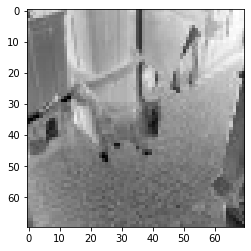

In [188]:
#rev=pca.inverse_transform(x_red)
plt.imshow(x_test[643].reshape(IMG_SIZE,IMG_SIZE),cmap=plt.cm.binary)


In [189]:
rf_clf=RandomForestClassifier(n_estimators=400,oob_score=True)
rf_clf.fit(x_red,y_train)
y_pred=rf_clf.predict(x_test_red)
#scores.append({"Random Forest":accuracy_score(y_test,y_pred)})
#scores["Random Forest"]=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.6265    0.6605    0.6431      2545
           1     0.6271    0.5919    0.6090      2455

    accuracy                         0.6268      5000
   macro avg     0.6268    0.6262    0.6260      5000
weighted avg     0.6268    0.6268    0.6263      5000



In [14]:
unique, counts = np.unique(y_pred, return_counts=True)
print(unique,counts)

[1] [2500]


In [15]:
unique, counts = np.unique(y_test, return_counts=True)
print(unique,counts)

[0 1] [1298 1202]


In [164]:
x_test

array([[0.21568627, 0.62745098, 0.52941176, ..., 0.72156863, 0.68235294,
        0.75686275],
       [0.4627451 , 0.19607843, 0.61960784, ..., 0.29019608, 0.53333333,
        0.21568627],
       [0.9254902 , 0.9254902 , 0.9372549 , ..., 0.67843137, 0.69019608,
        0.69411765],
       ...,
       [0.1372549 , 0.15686275, 0.18823529, ..., 0.75686275, 0.4627451 ,
        0.68235294],
       [1.        , 0.97254902, 0.90980392, ..., 0.43921569, 0.44313725,
        0.47058824],
       [0.94117647, 0.94901961, 0.94901961, ..., 0.99607843, 0.99607843,
        0.99607843]])